In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading the Dataset

In [3]:
natgas_df = pd.read_csv("Nat_Gas.csv") # Reading Natural Gas price data from CSV file

## Doing EDA to Understand the data

In [5]:
natgas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [6]:
natgas_df.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


In [7]:
natgas_df.count()

Dates     48
Prices    48
dtype: int64

## Visualizing price trends over time

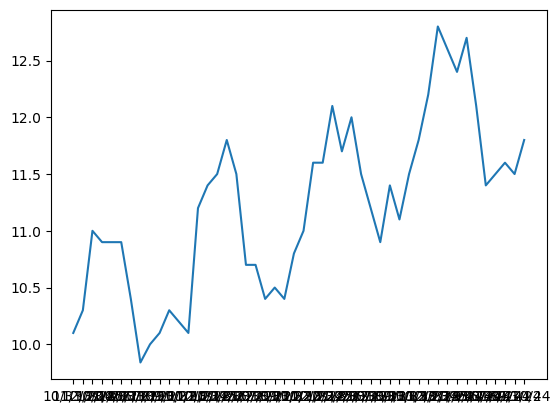

In [9]:
plt.plot(natgas_df['Dates'], natgas_df['Prices'])

## Data preprocessing
### Converting date column to datetime format
### Extracting Month and Year for further analysis

In [11]:
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])

natgas_df["Month"] = natgas_df['Dates'].dt.month
natgas_df["Year"] = natgas_df['Dates'].dt.year

C:\Users\kaust\AppData\Local\Temp\ipykernel_1668\1756524792.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


In [12]:
natgas_df.head()

,Dates,Prices,Month,Year
0,2020-10-31,10.1,10,2020
1,2020-11-30,10.3,11,2020
2,2020-12-31,11.0,12,2020
3,2021-01-31,10.9,1,2021
4,2021-02-28,10.9,2,2021


## Looking for which month price is highest around the year

In [14]:
Jan_Price = natgas_df[natgas_df['Month'] == 1]

In [15]:
Jan_Price

,Dates,Prices,Month,Year
3,2021-01-31,10.9,1,2021
15,2022-01-31,11.5,1,2022
27,2023-01-31,12.1,1,2023
39,2024-01-31,12.6,1,2024


In [16]:
Feb_Price = natgas_df[natgas_df['Month'] == 2]

In [17]:
Feb_Price

,Dates,Prices,Month,Year
4,2021-02-28,10.9,2,2021
16,2022-02-28,11.8,2,2022
28,2023-02-28,11.7,2,2023
40,2024-02-29,12.4,2,2024


## Function to get last dates of each month in a given year

In [19]:
import calendar
from datetime import date

def get_last_dates_of_year(year):
    last_dates = []
    for month in range(1, 13):
        # Get last day of the given month and year
        last_day = calendar.monthrange(year, month)[1]
        last_dates.append(f"{year}, {month}, {last_day}")
    return last_dates

In [20]:
get_last_dates_of_year(2025)

['2025, 1, 31',
 '2025, 2, 28',
 '2025, 3, 31',
 '2025, 4, 30',
 '2025, 5, 31',
 '2025, 6, 30',
 '2025, 7, 31',
 '2025, 8, 31',
 '2025, 9, 30',
 '2025, 10, 31',
 '2025, 11, 30',
 '2025, 12, 31']

In [21]:
dates_25 = get_last_dates_of_year(2025)

In [22]:
type(dates_25)

list

## Predicting next year prices using Linear Regression

In [24]:
def next_year_price(next_year):

    price_list = []
    for i in np.arange(12):
        x = np.array(natgas_df[natgas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(natgas_df[natgas_df['Month'] == 1+i]['Prices'])
        reg = LinearRegression().fit(x,y)
        price = reg.predict([[next_year]])[0]
        price_list.append(round(float(price),2))
    return price_list
    

In [25]:
next_year_price(2025)

[13.2,
 12.8,
 13.25,
 12.65,
 12.08,
 11.95,
 12.25,
 11.9,
 12.45,
 12.85,
 13.46,
 13.66]

In [26]:
natgas_price_25 = next_year_price(2025)
np.array(natgas_price_25)

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

# New DataFrame for 2025 Dates and Prices

In [28]:
pre_natgas_price_25_df = pd.DataFrame({'Dates' : dates_25, 'Prices' : natgas_price_25})
pre_natgas_price_25_df

,Dates,Prices
0,"2025, 1, 31",13.20
1,"2025, 2, 28",12.80
2,"2025, 3, 31",13.25
3,"2025, 4, 30",12.65
4,"2025, 5, 31",12.08
5,"2025, 6, 30",11.95
6,"2025, 7, 31",12.25
7,"2025, 8, 31",11.90
8,"2025, 9, 30",12.45
9,"2025, 10, 31",12.85


In [29]:
pre_natgas_price_25_df['Dates'] = pd.to_datetime(pre_natgas_price_25_df['Dates'])

In [30]:
pre_natgas_price_25_df['Month'] = pre_natgas_price_25_df['Dates'].dt.month
pre_natgas_price_25_df['Year'] = pre_natgas_price_25_df['Dates'].dt.year
pre_natgas_price_25_df

,Dates,Prices,Month,Year
0,2025-01-31,13.20,1,2025
1,2025-02-28,12.80,2,2025
2,2025-03-31,13.25,3,2025
3,2025-04-30,12.65,4,2025
4,2025-05-31,12.08,5,2025
5,2025-06-30,11.95,6,2025
6,2025-07-31,12.25,7,2025
7,2025-08-31,11.90,8,2025
8,2025-09-30,12.45,9,2025
9,2025-10-31,12.85,10,2025


## Applying same steps for remaining three months of 2024

In [32]:
import calendar
from datetime import date

def get_last_dates_of_year(year):
    last_dates = []
    for month in range(10, 13):
        # Get last day of the given month and year
        last_day = calendar.monthrange(year, month)[1]
        last_dates.append(f"{year}, {month}, {last_day}")
    return last_dates

In [33]:
get_last_dates_of_year(2024)

['2024, 10, 31', '2024, 11, 30', '2024, 12, 31']

In [34]:
last_three_months_24 = get_last_dates_of_year(2024)

In [35]:
def last_three_months_price(year):
    price_list = []
    for i in [10, 11, 12]:  # Months October, November, December
        x = np.array(natgas_df[natgas_df['Month'] == i]['Year']).reshape(-1, 1)
        y = np.array(natgas_df[natgas_df['Month'] == i]['Prices'])
        reg = LinearRegression().fit(x, y)
        price = reg.predict([[year]])[0]
        price_list.append(round(float(price), 2))
    return price_list

In [36]:
last_three_months_price(2024)

[12.25, 12.85, 13.1]

In [37]:
last_three_months_price_24 = last_three_months_price(2024)

In [38]:
last_three_months_Price_24_df = pd.DataFrame({"Dates" : last_three_months_24, "Prices" : last_three_months_price_24})

In [39]:
last_three_months_Price_24_df

,Dates,Prices
0,"2024, 10, 31",12.25
1,"2024, 11, 30",12.85
2,"2024, 12, 31",13.10


In [40]:
last_three_months_Price_24_df['Dates'] = pd.to_datetime(last_three_months_Price_24_df['Dates'])
last_three_months_Price_24_df['Month'] = last_three_months_Price_24_df['Dates'].dt.month
last_three_months_Price_24_df['Year'] = last_three_months_Price_24_df['Dates'].dt.year
last_three_months_Price_24_df

,Dates,Prices,Month,Year
0,2024-10-31,12.25,10,2024
1,2024-11-30,12.85,11,2024
2,2024-12-31,13.10,12,2024


## Concat all three DataFrames

In [42]:
ng_df = pd.concat([natgas_df,last_three_months_Price_24_df, pre_natgas_price_25_df], ignore_index = True)
ng_df

,Dates,Prices,Month,Year
0,2020-10-31,10.10,10,2020
1,2020-11-30,10.30,11,2020
2,2020-12-31,11.00,12,2020
3,2021-01-31,10.90,1,2021
4,2021-02-28,10.90,2,2021
...,...,...,...,...
58,2025-08-31,11.90,8,2025
59,2025-09-30,12.45,9,2025
60,2025-10-31,12.85,10,2025
61,2025-11-30,13.46,11,2025


In [43]:
ng_df[ng_df['Year'] == 2024]

,Dates,Prices,Month,Year
39,2024-01-31,12.60,1,2024
40,2024-02-29,12.40,2,2024
41,2024-03-31,12.70,3,2024
42,2024-04-30,12.10,4,2024
43,2024-05-31,11.40,5,2024
44,2024-06-30,11.50,6,2024
45,2024-07-31,11.60,7,2024
46,2024-08-31,11.50,8,2024
47,2024-09-30,11.80,9,2024
48,2024-10-31,12.25,10,2024


## Creating function to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 

In [45]:
def get_ng_price(month, year):
    print(ng_df[(ng_df['Month'] == month) & (ng_df['Year'] == year)]["Prices"])

In [46]:
get_ng_price(10, 2025)

60    12.85
Name: Prices, dtype: float64


## Visualizing Prediction Results

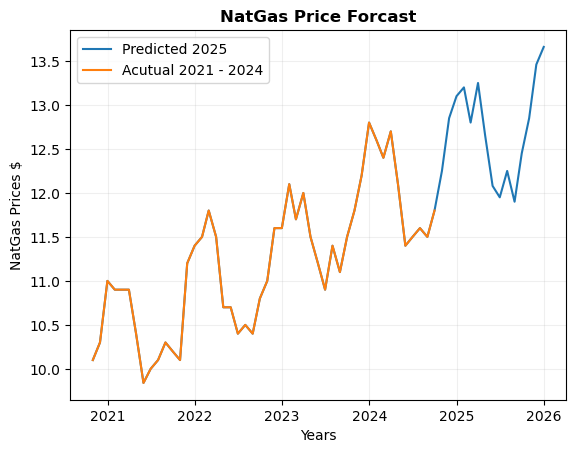

In [48]:
plt.plot(ng_df['Dates'], ng_df['Prices'], label = 'Predicted 2025')
plt.plot(natgas_df['Dates'], natgas_df['Prices'], label = 'Acutual 2021 - 2024')
plt.ylabel('NatGas Prices $')
plt.xlabel('Years')
plt.title("NatGas Price Forcast", fontweight = 'bold')
plt.grid(True, alpha = 0.2)
plt.legend()